# Numerisk løsning av PDE  

Vi ser på noen metoder for løsning av partielle differensiallikninger. 

Vi henviser til oppgaver og forelesninger for gjennomgang. 



# 1D Laplace/Poisson

Vi ser på likningen $$u_{xx} + f(x) = 0$$ for $x=0..1$ med randbetingelser $u(0)=a$ og $u(1)=b$. 

Brukes f.eks. til å finne stasjonær løsning for varmeledning og andre diffusjonsprosesser. 


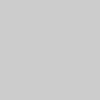

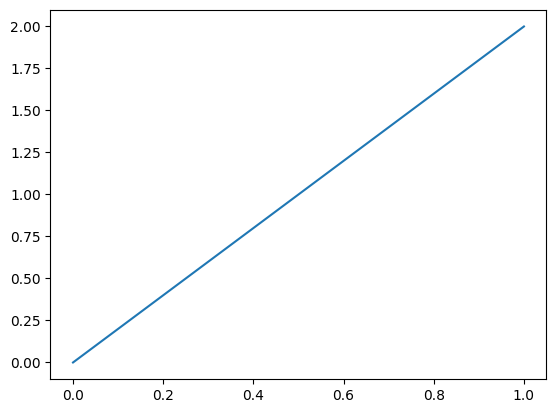

In [1]:
#
# 1D Laplace (stasjonær varmelikning)
# Differansemetode
# 
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

m = 1000
x = np.linspace(0,1,m+2)
h = x[1] - x[0]

#
# Setter opp en likning Lx = F
#
L = (1/h**2)*(np.diag((m-1)*[1], -1) + np.diag((m)*[-2],0) + np.diag((m-1)*[1],1))

# randbetingelsene
a = 0
b = 2

F = np.zeros(m) # F = f(x[1:-1]) for Poisson
F[0] -= a/(h**2)   
F[-1] -= b/(h**2)  

u = np.zeros(m+2)
u[0] = a
u[-1] = b

u[1:-1] = la.solve(L,F)

plt.plot(x,u) 


# 2D Laplace

Mye det samme som i 1d, men oppsett av matrise er litt vanskeligere. Bruken av Kroneckerproduktet forenkler veldig.

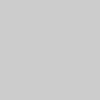

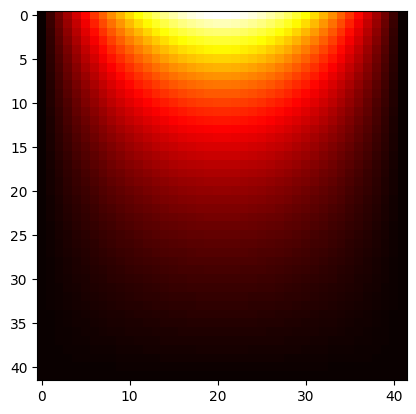

In [4]:
#
# 2D Poisson/Laplace
#
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la

# Oppsett datapunkter
m = 40
x = np.linspace(0,1,m+2) 
h = x[1] - x[0]            

n = 40
y = np.linspace(0,1,n+2)
k = y[1] - y[0]

# Oppsett matrise L
Lm = (1/h**2)*(np.diag((m-1)*[1],-1) + np.diag((m)*[-2],0) + np.diag((m-1)*[1],1))
Im = np.eye(m)
Ln = (1/k**2)*(np.diag((n-1)*[1],-1) + np.diag((n)*[-2],0) + np.diag((n-1)*[1],1))
In = np.eye(n)

L = np.kron(In, Lm) + np.kron(Ln, Im)

# Randbetingelser

# vektor (-1/h^2,0,0,0,...) med m elementer
Zm_l = np.zeros(m)
Zm_l[0] = -1/(h**2)

# vektor (0,0,0,...,0,-1/h^2) med m elementer
Zm_r = np.zeros(m)
Zm_r[-1] = -1/(h**2)

# vektor (-1/k^2,0,0,0,...) med n elementer
Zn_l = np.zeros(n)
Zn_l[0] = -1/(k**2)

# vektor (0,0,0,...,0,-1/k^2) med n elementer
Zn_r = np.zeros(n)
Zn_r[-1] = -1/(k**2)

# funksjonen som gir u(x,0)
def u0x(x):
    return np.sin(np.pi*x)

# funksjonen som gir u(x,1)
def u1x(x):
    return 0*x
    
# funksjonen som gir u(y,0)
def uy0(y):
    return 0*y

    
# funksjonen som gir u(y,1)
def uy1(y):
    return 0*y
    
# Lag en vektor for randbetingelser
F =  np.kron(Zn_l,u0x(x[1:-1])) + np.kron(Zn_r,u1x(x[1:-1])) 
F += np.kron(uy0(y[1:-1]),Zm_l) + np.kron(uy1(y[1:-1]),Zm_r)

#
# Kun hvis Poissonlikning: Hopp over for Laplace
#
X,Y = np.meshgrid(x[1:-1],y[1:-1], indexing='ij')

def g(x,y):
    return 0*y+0*x 
   
G = -g(X,Y)
G = np.reshape(G,(m*n))


F = F + G

# Vi løser
u = la.solve(L,F)

# "reshape" til et rutenett
U = np.zeros((n+2,m+2))
U[1:-1,1:-1] = np.reshape(u, (n,m))
U[ 0, :] = u0x(x)
U[-1, :] = u1x(x)
U[ :, 0] = uy0(y)
U[ :,-1] = uy1(y)

# y-akse er speilvendt
plt.imshow(U, cmap='hot', interpolation='nearest')


# 1D varmelikning

Vi løser $u_t=c^2u_{xx}+f$ for $x=0..1$, $u(x,0)=\sin(\pi\cdot x)$, $u(0,t)=a$ og $u(1,t)=b$. Funksjonen $f$ er satt til $0$ i koden, men det kan endres.

0.19221922192219223 <1/2


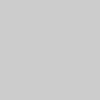

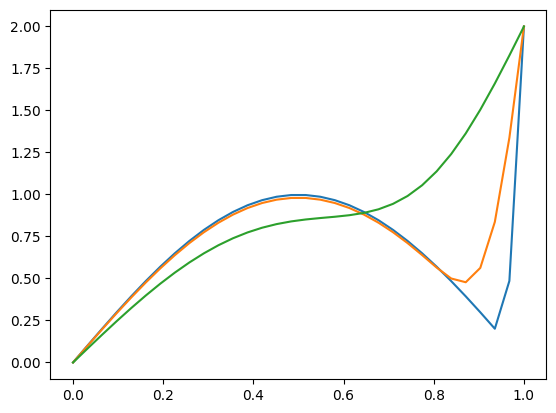

In [ ]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# oppsett problem
c = 1
a = 0
b = 2

# diskretisering x-retning
m = 30
x = np.linspace(0, 1, m + 2)
dx = x[1] - x[0]  

# likningssystem som for Laplce/Poisson
L = (c**2/dx**2)*(np.diag((m-1)*[1], -1) + np.diag(m*[-2],0) + np.diag((m-1)*[1],1))
F = np.zeros(m)   # erstattes med F = -f(x[1:-1]) hvis f er forskjellig fra 0.
F[0] = (c**2) * -a/(dx**2)
F[-1] = (c**2) * -b/(dx**2)

# diskretisering t-retning
N = 10000  
t = np.linspace(a, b, N)
dt = t[1] - t[0]

print(c**2*dt/dx**2, "< 0.5")  # stabilt?

u = np.zeros((x.size, N))
u[ :, 0] = np.sin(np.pi*x)  
u[ 0, :] = a   
u[-1, :] = b  

for i in np.arange(N-1):
    u[1:-1, i+1] = u[1:-1, i] + dt*(L @ (u[1:-1, i]) - F)

# plotting
plt.plot(x,u[:, 1])    # 1 tidssteg i blå
plt.plot(x,u[:, 10])   # 10 tidssteg i oransje
plt.plot(x,u[:, 100])  # 100 tidssteg i grønn


Alternativ løsning for $u_t = c^2u_{xx}$, for $x = 0..1$, med $u(0,t)=g_0(t), u(1,t)=g_1(t), u(x,0)=h(x)$.

0.315 < 0.5


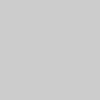

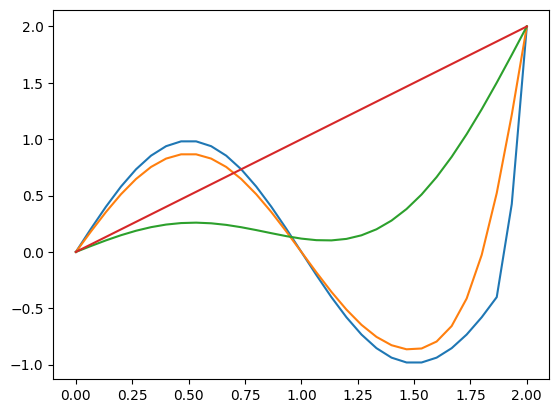

In [38]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

# oppsett problem
c = 1

# diskretisering x-retning
m = 30     # antall intervall
dx = 1/m   # bredde intervall
x = np.linspace(0,2,m + 1)  

# diskretisering t-retning
tstart = 0.0
tslutt = 7.0
n = 20000                # antall intervall
dt = (tslutt-tstart)/n   # bredde intervall
t = np.linspace(tstart,tslutt,n + 1) 

# initialbetingelser/randverdier
h  = lambda x : np.sin(np.pi*x)  
g0 = lambda t : 0
g1 = lambda t : 2

# løsning
u = np.zeros((m + 1, n + 1))  # u[x, t]
u[:,0] = h(x)    # initialverdi
u[ 0, :] = g0(t) # randverdier
u[-1, :] = g1(t)

steg = c**2*dt/dx**2               
print(steg,"< 0.5") # stabilt?

for i in range(n):
    u[1:-1, i+1] = u[1:-1,i] + steg*(u[2:,i] - 2*u[1:-1,i] + u[0:-2,i])  

# plotting
plt.plot(x,u[:, 1])    # 1 tidssteg i blå
plt.plot(x,u[:, 10])   # 10 tidssteg i oransje
plt.plot(x,u[:, 100])  # 100 tidssteg i grønn
plt.plot(x,u[:, 10000]) # 1000 tidssteg i rødt
    

# Volummetode 1D laplace

Vi viser volummetode for en varmelikning definert på et stavelement for $x=0..0.5$, med randbetingelsene $u(0)=100$, $u(1)=500$. Det vil si, dette er 1D tilfellet av likningen 

$$\nabla \cdot (k \nabla u) = 0.$$

Løsning av problemet på kontrollvolum er gjort for hånd på forhånd. Vi trenger ikke lenger uniform oppdeling av intervallet.
    
Vi lar $kA=10$ hvor $A$ er areal på tverssnitt på stavelementet.

[0.10416097 0.13973901 0.03387766 0.0502033  0.06291002 0.10910905]


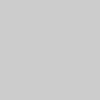

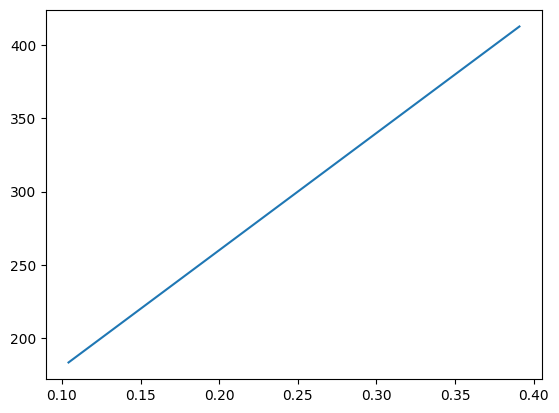

In [54]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

m = 5
x = np.random.rand(m+2)*0.5
x = np.sort(x)
x[0]  = 0
x[-1] = 0.5
#x = np.array([0,0.05,0.15,0.25,0.35,0.45,0.5]) # eksempel fra Versteeg
kA = 10      # termisk diffusitivtet * areal på tverrsnitt
dx = x[1 : ] - x[ : -1]
print(dx)
a = 100
b = 500

L = kA*(-np.diag((1/dx)[1:-1],  1) - np.diag(1/dx[1:-1], -1) + np.diag(1/dx[1:], 0) + np.diag(1/dx[:-1], 0)) 
F = np.zeros((m))
F[0]  = kA*1/dx[0]*a
F[-1] = kA*1/dx[-1]*b

u = la.solve(L, F)

plt.plot(x[1:-1],u)

